In [15]:
from generator import heterograph_from_vvg_generator


# enable auto reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from loader import hetero_graph_loader
octa_dr_dict = {"Healthy": 0, "DM": 0, "PDR": 3, "Early NPDR": 1, "Late NPDR": 2}
label_names = ["Healthy/DM", "Early NPDR","Late NPDR", "PDR"]

data_type = "DCP"

vessel_graph_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_vessel_graph"
label_file = "/media/data/alex_johannes/octa_data/Cairo/labels.csv"
void_graph_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_void_graph"
hetero_edges_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_heter_edges"


mode_train = "all"
full_pickle = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_{mode_train}_dataset.pkl"
full_dataset = hetero_graph_loader.HeteroGraphLoaderTorch(vessel_graph_path,
                                                        void_graph_path,
                                                        hetero_edges_path,
                                                        mode = mode_train,
                                                        label_file = label_file, 
                                                        line_graph_1 =True, 
                                                        class_dict = octa_dr_dict,
                                                        pickle_file = full_pickle
                                                        )

In [19]:
full_dataset.hetero_graphs["0002_OS"].x_dict["graph_1"]

tensor([[0.8385, 0.0000,    inf,  ..., 4.0000, 1.0000, 0.0000],
        [2.0000, 2.0000, 1.0000,  ..., 3.0000, 1.0000, 1.0000],
        [4.1281, 4.0689, 1.0146,  ..., 3.0000, 2.0000, 1.0000],
        ...,
        [1.4142, 1.4142, 1.0000,  ..., 3.0000, 0.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 3.0000, 0.0000, 1.0000],
        [1.6996, 1.6996, 1.0000,  ..., 3.0000, 0.0000, 1.0000]])

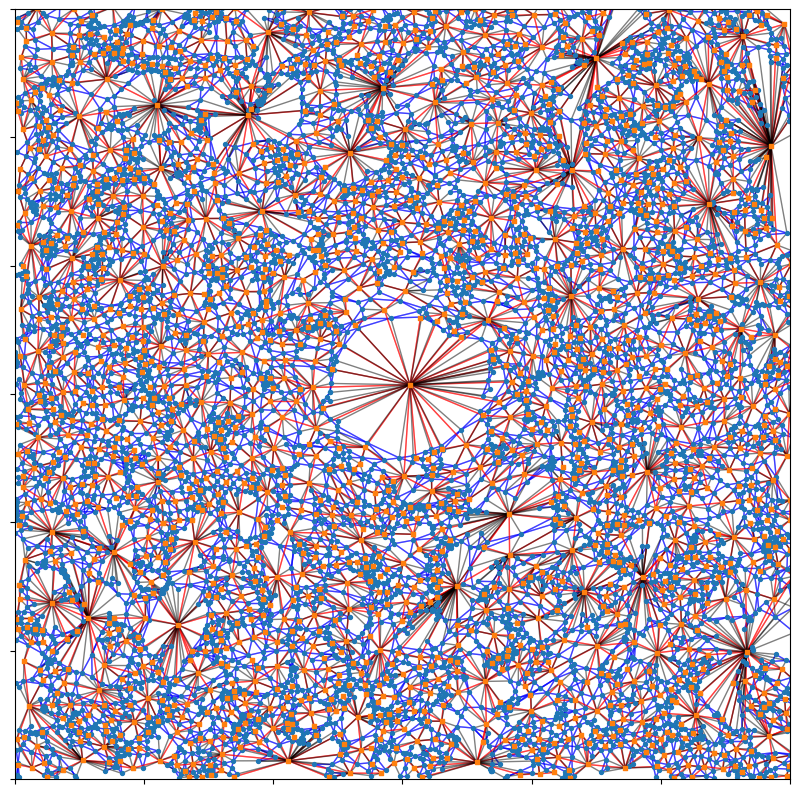

In [34]:
from graph_plotting import graph_2D
from torch_geometric.data import Data
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(10, 10))
plotter = graph_2D.HeteroGraphPlotter2D()
plotter.plot_graph_2D(full_dataset.hetero_graphs["0484_OS"], ax = ax)

plt.show()
plt.close()


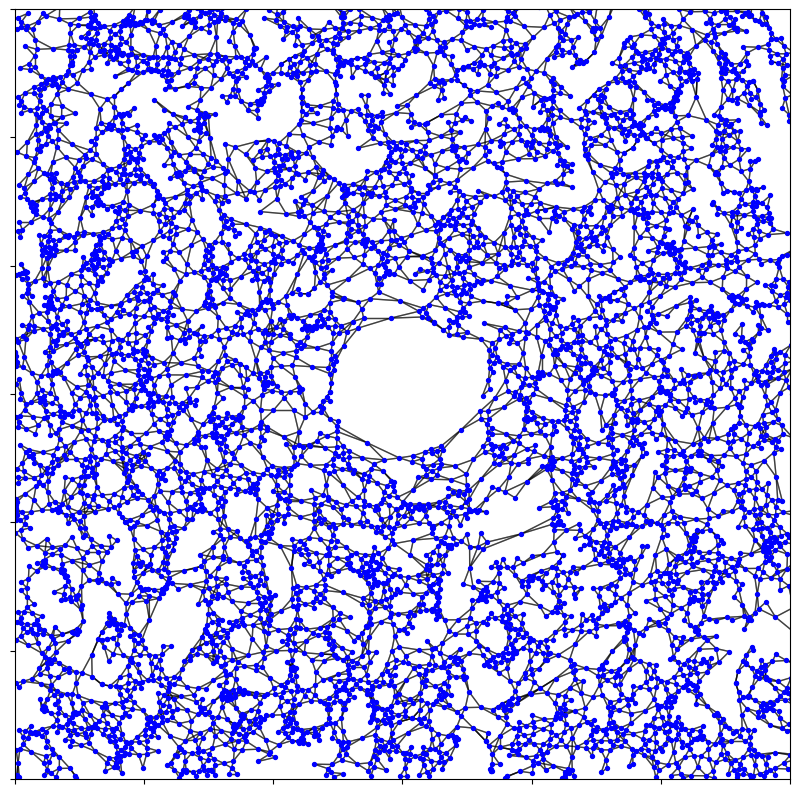

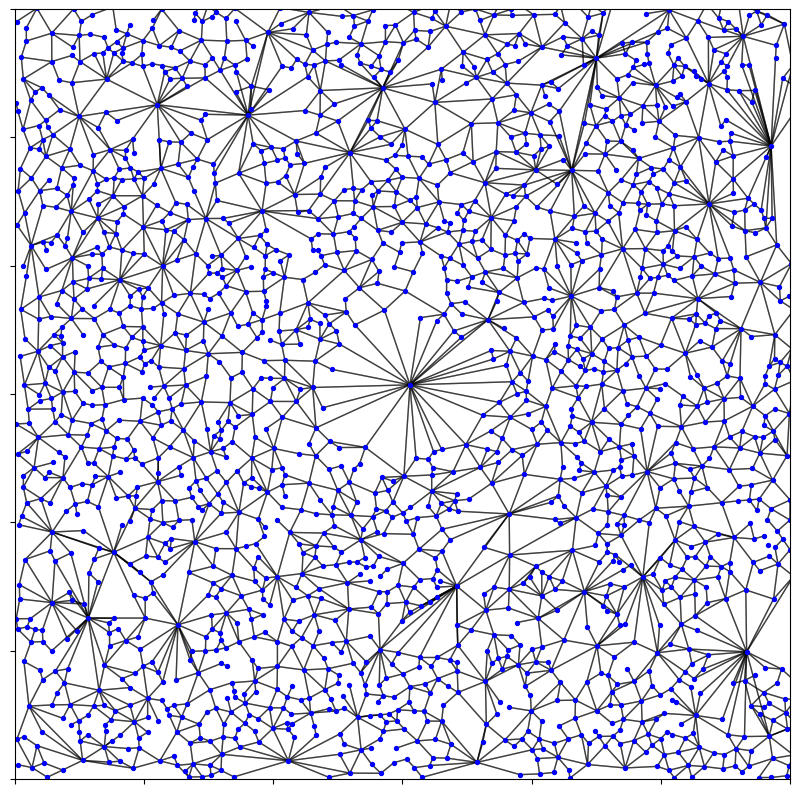

In [33]:


#full_dataset.hetero_graphs["0484_OS"]

vessel_g = Data(x=full_dataset.hetero_graphs["0484_OS"].x_dict["graph_1"], edge_index= full_dataset.hetero_graphs["0484_OS"].edge_index_dict["graph_1", "to", "graph_1"], pos = full_dataset.hetero_graphs["0484_OS"].pos_dict["graph_1"])

icp_g = Data(x=full_dataset.hetero_graphs["0484_OS"].x_dict["graph_2"], edge_index= full_dataset.hetero_graphs["0484_OS"].edge_index_dict["graph_2", "to", "graph_2"], pos = full_dataset.hetero_graphs["0484_OS"].pos_dict["graph_2"])

fig, ax = plt.subplots(figsize=(10, 10))
plotter2d = graph_2D.GraphPlotter2D(vessel_g)
plotter2d.plot_graph_2D(ax=ax)
plt.show()
plt.close()


fig, ax = plt.subplots(figsize=(10, 10))
plotter2d = graph_2D.GraphPlotter2D(icp_g)
plotter2d.plot_graph_2D(ax=ax)
plt.show()
plt.close()

In [ ]:
data_type = "DCP"

segmentation_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_seg"
json_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_json"
image_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_images"

#void_graph_save_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_void_graph_faz_node"
#hetero_edges_save_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_heter_edges_faz_node"

#faz_node_save_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_faz_nodes"
#faz_region_edge_save_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_faz_region_edges"
#faz_vessel_edge_save_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_faz_vessel_edges"

faz_node_save_path = "None"
faz_region_edge_save_path = "None"
faz_vessel_edge_save_path = "None"

void_graph_save_path = "None"
hetero_edges_save_path = "None"



Gernerator_from_VVG = heterograph_from_vvg_generator.HeterographFromVVGGenerator(
                                                            seg_path= segmentation_path,
                                                            vvg_path= json_path,
                                                            void_graph_save_path= void_graph_save_path,
                                                            hetero_edges_save_path= hetero_edges_save_path,
                                                            image_path= image_path,
                                                            debug=True,
                                                            force= True,
                                                            faz_node= True,
                                                            faz_node_save_path= faz_node_save_path,
                                                            faz_region_edges_save_path= faz_region_edge_save_path,
                                                            faz_vessel_edges_save_path= faz_vessel_edge_save_path
                                                            )
Gernerator_from_VVG.save_region_graphs()